In [2]:
!pip install textstat
!wget https://huggingface.co/stanfordnlp/CoreNLP/resolve/main/stanford-corenlp-latest.zip
!unzip stanford-corenlp-latest.zip


Defaulting to user installation because normal site-packages is not writeable
--2023-11-02 11:59:18--  https://huggingface.co/stanfordnlp/CoreNLP/resolve/main/stanford-corenlp-latest.zip
Resolviendo huggingface.co (huggingface.co)... 2600:9000:24de:400:17:b174:6d00:93a1, 2600:9000:24de:be00:17:b174:6d00:93a1, 2600:9000:24de:ac00:17:b174:6d00:93a1, ...
Conectando con huggingface.co (huggingface.co)[2600:9000:24de:400:17:b174:6d00:93a1]:443... conectado.
Petición HTTP enviada, esperando respuesta... 302 Found
Ubicación: https://cdn-lfs.huggingface.co/stanfordnlp/CoreNLP/e7b1b5e237d11db620c1b237db751cc7d413ec5c613e8ee4b5645fdc953ba67a?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27stanford-corenlp-latest.zip%3B+filename%3D%22stanford-corenlp-latest.zip%22%3B&response-content-type=application%2Fzip&Expires=1699178359&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTY5OTE3ODM1OX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZ

In [3]:
#%cd /content/drive/MyDrive/stanford-corenlp-4.5.5/
%cd stanford-corenlp-4.5.5/
#!cd stanford-corenlp-4.5.5/
!java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9001 -timeout 15000

/home/alex_linux_2023/Descargas/stanford-corenlp-4.5.5
[main] INFO CoreNLP - --- StanfordCoreNLPServer#main() called ---
[main] INFO CoreNLP - Server default properties:
			(Note: unspecified annotator properties are English defaults)
			inputFormat = text
			outputFormat = json
			prettyPrint = false
[main] INFO CoreNLP - Threads: 8
[main] INFO CoreNLP - Starting server...
[main] INFO CoreNLP - StanfordCoreNLPServer listening at /0:0:0:0:0:0:0:0:9001
^C
[Thread-0] INFO CoreNLP - CoreNLP Server is shutting down.


In [61]:
from nltk.parse import CoreNLPParser
import nltk
#nltk.download('punkt')
import textstat
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
#%cd /content/drive/MyDrive/ProyectoNLP/
# Sample text containing a rule
"""Sample_text = {
    "The manager shall approve the budget.",
    "The quick brown fox jumps over the lazy dog.",
    "If the weather is nice, we shall have a picnic.",
    "When the alarm rings, you shall evacuate the building.",
    "Unless you complete your assignment, you shall not receive a grade.",
    "The first protocol shall be implemented.",
}"""
# Read the sample text from a .txt file
file_path = 'ChessRules.txt'  # Replace with the actual path to your .txt file
with open(file_path, 'r') as file:
    ChessRules = file.read()
ChessRulesDataSet = nltk.sent_tokenize(ChessRules)

# Read the sample text from a .txt file
file_path = 'INTEL.txt'  # Replace with the actual path to your .txt file
with open(file_path, 'r') as file:
    ChessRules = file.read()
IntelDataSet = nltk.sent_tokenize(ChessRules)



# Initialize the CoreNLPParser with the CoreNLP server URL
parser = CoreNLPParser(url="http://localhost:9001")

# Define a list of prepositions
prepositions = ["above", "across", "against", "along", "among", "around", "at", "before", "behind", "below", "beneath", "beside", "between", "by", "down", "from", "in", "into", "near", "of", "off", "on", "to", "toward", "under", "upon", "with", "within"]


In [45]:
def getFideSamples():
    file_path = 'FIDE_Ubiquitous_dataset.txt'  # Replace with the actual path to your .txt file
    with open(file_path, 'r') as file:
        UbiquitousBySight = file.read()

    file_path = 'FIDE_Event-Driven_dataset.txt'  # Replace with the actual path to your .txt file
    with open(file_path, 'r') as file:
        EventBySight = file.read()

    file_path = 'FIDE_State-Driven_dataset.txt'  # Replace with the actual path to your .txt file
    with open(file_path, 'r') as file:
        StateBySight = file.read()
    return UbiquitousBySight,EventBySight,StateBySight

def getIntelSamples():
    file_path = 'INTEL_Ubiquitous_dataset.txt'  # Replace with the actual path to your .txt file
    with open(file_path, 'r') as file:
        UbiquitousBySight = file.read()

    file_path = 'INTEL_Event-Driven_dataset.txt'  # Replace with the actual path to your .txt file
    with open(file_path, 'r') as file:
        EventBySight = file.read()

    file_path = 'INTEL_State-Driven_dataset.txt'  # Replace with the actual path to your .txt file
    with open(file_path, 'r') as file:
        StateBySight = file.read()
    return UbiquitousBySight,EventBySight,StateBySight

In [46]:
def checkUbiquitous(parsed_tree):
    the = shall = False
    for tree in parsed_tree:
        for word, tag in tree.pos():
            if tag in ['DT', 'NN'] and word.lower() == 'the': #Case sensitive because it has to be the first word of the sentence
                the = True
            elif the and tag == 'MD' and word.lower() == 'shall':
                shall = True
            '''if (tag == 'WRB' and word.lower() == 'when') or (tag == 'IN' and word.lower() == 'while') :
                shall = False
                break
            '''
    return shall

In [47]:
def checkEvent(parsed_tree):
    when = the = shall = False
    for tree in parsed_tree:
        for word, tag in tree.pos():
            if tag == 'WRB' and word.lower() == 'when':
                when = True
            elif when and tag in ['DT', 'NN'] and word.lower() == 'the':
                the = True
            elif the and tag == 'MD' and word.lower() == 'shall':
                shall = True
    return shall

In [48]:
def checkState(parsed_tree):
    while_ = the = shall = False
    for tree in parsed_tree:
        for word, tag in tree.pos():
            if tag == 'IN' and word.lower() == 'while':
                while_ = True
            elif while_ and tag in ['DT', 'NN'] and word.lower() == 'the':
                the = True
            elif the and tag == 'MD' and word.lower() == 'shall':
                shall = True
    return shall

In [49]:
def countNounsAdjectives(parsed_tree, nouns, adjectives):
    for tree in parsed_tree:
        for word, tag in tree.pos():
            if tag in ['NN', 'NNS']:
                nouns += 1
            elif tag in ['JJ', 'JJR', 'JJS']:
                adjectives += 1
    return nouns, adjectives

In [69]:
r = "When an Order is shipped and Order Terms are not “Prepaid”, the system shall create an Invoice."
parsed_tree = list(parser.raw_parse(r))
print(checkEvent(parsed_tree))

True


In [71]:
TPUbiq = TNUbiq = FNUbiq = FPUbiq = 0
TPEvent = TNEvent = FNEvent = FPEvent = 0
TPState = TNState = FNState = FPState = 0
totalSentences = UbiquitousCont = EventCont = StateCont = nonCont = 0
appearsStateRule = appearsUbiquitousRule = appearsEventRule = False

# Initialize counters for the requested features
total_words = 0
distinct_tokens = set()
preposition_count = 0
total_noun_count = 0
total_adjective_count = 0

input_text = 0

if input_text:
    sample_text = ChessRulesDataSet
    UbiquitousBySight, EventBySight, StateBySight = getFideSamples()
  #print(UbiquitousBySight)
else:
    sample_text = IntelDataSet
    UbiquitousBySight, EventBySight, StateBySight = getIntelSamples()

for sentence in sample_text:
    found_tp = found_fn = False
    #print(sentence, "\n")

    totalSentences +=1
    #presence_the = presence_shall = presmódulosence_conditional = False
    # Tokenize and parse the input text
    parsed_tree = list(parser.raw_parse(sentence))

    # Update the total number of words
    total_words += len(sentence.split())

    #Check for Ubiquitous rule presence
    appearsUbiquitousRule = checkUbiquitous(parsed_tree)

    #Check for Event-Driven rule presence
    appearsEventRule = checkEvent(parsed_tree)

    #Check for State-Driven rule presence
    appearsStateRule = checkState(parsed_tree)

    if appearsUbiquitousRule or appearsEventRule or appearsStateRule:
        #print(sentence)
        # Count the number of nouns and adjectives
        total_noun_count, total_adjective_count = countNounsAdjectives(parsed_tree, total_noun_count, total_adjective_count)

        # Count distinct tokens (words)
        distinct_tokens.update(sentence.split())

        # Count the number of prepositions in the sentence
        preposition_count += sum(sentence.lower().count(preposition) for preposition in prepositions)

    #Count number of True Positives and True Negatives of Rules
    if appearsUbiquitousRule:
        UbiquitousCont += 1
        if sentence in UbiquitousBySight: TPUbiq += 1
        else:                             FPUbiq += 1

    else:
        if sentence in UbiquitousBySight: FNUbiq += 1
        else:                             TNUbiq += 1

    if appearsEventRule:
        print(sentence)
        EventCont += 1
        if sentence in EventBySight: TPEvent += 1
        else:                             FPEvent += 1

    else:
        if sentence in EventBySight: 
            print(sentence)
            FNEvent += 1
        else:                             TNEvent += 1

    if appearsStateRule:
        StateCont += 1
        if sentence in StateBySight: TPState += 1
        else:                             FPState += 1

    else:
        if sentence in StateBySight: FNState += 1
        else:                             TNState += 1


# Calculate the proportion of distinct tokens over total words
proportion_distinct_tokens = len(distinct_tokens) / total_words

# Calculate the proportion of prepositions over total words
proportion_prepositions = preposition_count / total_words

#Calculate readibility with textstat
readability = textstat.automated_readability_index(ChessRules)

#All the appearences of the Ubiquitous rule has been counted by sight
if input_text:
    ICCGI2013Ubiquitous = 71
    ICCGI2013Event = 0
    ICCGI2013State = 0
else:
    ICCGI2013Ubiquitous = 58
    ICCGI2013Event = 12
    ICCGI2013State = 8
    
# Print the results
print("Total sentences in the file:", totalSentences)

print("\nNumber of Ubiquitous rules detected:", UbiquitousCont)
print("Ubiquitous Rule Analysis Results")
print(TPUbiq,"   ", FPUbiq)
print(FNUbiq,"   ", TNUbiq)
print("The accuracy of the script on the recognition of Ubiquious rule instances is:", ((TPUbiq + TNUbiq) / totalSentences )*100)

print("\nNumber of Event-Driven rules detected:", EventCont)
print("Event-Driven Rule Analysis Results")
print(TPEvent,"   ", FPEvent)
print(FNEvent,"   ", TNEvent)
print("The accuracy of the script on the recognition of Event-Driven rule instances is:", ((TPEvent + TNEvent) / totalSentences )*100)

print("\nNumber of State-Driven rules detected:", StateCont)
print("State-Driven Rule Analysis Results")
print(TPState,"   ", FPState)
print(FNState,"   ", TNState)
print("The accuracy of the script on the recognition of State-Driven rule instances is:", ( (TPState + TNState) / totalSentences )*100)

print("General metrics of the file:")
print("Total number of words:", total_words)
print("Proportion of distinct tokens in sentences that fit any of the rules:", proportion_distinct_tokens)
print("Proportion of preposition words in sentences that fit any of the rules:", proportion_prepositions)
print("Number of nouns in sentences that fit any of the rules:", total_noun_count)
print("Total number of adjectives in sentences that fit any of the rules:", total_adjective_count)
print("Readability for Ubiquitous rule", readability)


• When a DVD is inserted into the DVD player, the OS shall
     spin up the optical drive.
• When the water level falls below the Low Water
     Threshold, the software shall open the water valve
     to fill the tank to the High Water Threshold.
• Where a second optical drive is installed, when the user
     selects to copy disks, the software shall display an option
     to copy directly from one optical drive to the other optical
     drive.
• While in start up mode, when the software detects an
     external flash card, the software shall use the external
     flash card to store photos.
Total sentences in the file: 329

Number of Ubiquitous rules detected: 23
Ubiquitous Rule Analysis Results
18     5
5     301
The accuracy of the script on the recognition of Ubiquious rule instances is: 96.96048632218846

Number of Event-Driven rules detected: 1
Event-Driven Rule Analysis Results
1     0
3     325
The accuracy of the script on the recognition of Event-Driven rule instances is: 99.

Possible dataset https://github.com/facebookresearch/asset/blob/main/dataset/asset.valid.simp.9

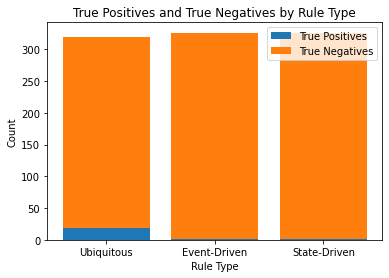

      Rule Type  True Positives  False Positives  True Negatives  \
0    Ubiquitous              18                5             301   
1  Event-Driven               1                0             325   
2  State-Driven               2                0             323   

   False Negatives  Accuracy (%)  
0                5     96.960486  
1                3     99.088146  
2                4     98.784195  


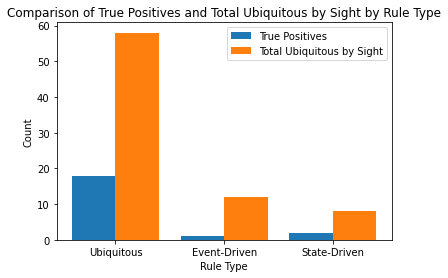

In [72]:

# Definir los datos
detected_rules = ["Ubiquitous", "Event-Driven", "State-Driven"]
true_positives = [TPUbiq, TPEvent, TPState]
true_negatives = [TNUbiq, TNEvent, TNState]

# Crear un gráfico de barras
plt.bar(detected_rules, true_positives, label='True Positives')
plt.bar(detected_rules, true_negatives, label='True Negatives', bottom=true_positives)

# Agregar etiquetas y leyenda
plt.xlabel('Rule Type')
plt.ylabel('Count')
plt.title('True Positives and True Negatives by Rule Type')
plt.legend()
plt.show()

# Crear un diccionario con los resultados
results_data = {
    "Rule Type": ["Ubiquitous", "Event-Driven", "State-Driven"],
    "True Positives": [TPUbiq, TPEvent, TPState],
    "False Positives": [FPUbiq, FPEvent, FPState],
    "True Negatives": [TNUbiq, TNEvent, TNState],
    "False Negatives": [FNUbiq, FNEvent, FNState],
    "Accuracy (%)": [((TPUbiq + TNUbiq) / totalSentences) * 100, ((TPEvent + TNEvent) / totalSentences) * 100, ((TPState + TNState) / totalSentences) * 100]
}

# Crear un DataFrame de Pandas
results_df = pd.DataFrame(results_data)

# Mostrar la tabla
print(results_df)


import matplotlib.pyplot as plt

# Datos
rule_types = ["Ubiquitous", "Event-Driven", "State-Driven"]
true_positives = [TPUbiq, TPEvent, TPState]
total_ubiquitous_by_sight = [ICCGI2013Ubiquitous, ICCGI2013Event, ICCGI2013State]

# Posiciones de las barras en el eje x
x = range(len(rule_types))

# Ancho de las barras
width = 0.4

# Crear el gráfico de barras
fig, ax = plt.subplots()
bar1 = ax.bar(x, true_positives, width, label='True Positives')
bar2 = ax.bar([i + width for i in x], total_ubiquitous_by_sight, width, label='Total Ubiquitous by Sight')

# Etiquetas de eje x y título
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(rule_types)
ax.set_xlabel('Rule Type')
ax.set_ylabel('Count')
ax.set_title('Comparison of True Positives and Total Ubiquitous by Sight by Rule Type')

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico
plt.show()
